# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
#import all the libraries here
import pickle
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
np.random.seed(31)   #Initialing the seed,to number 10


# Load *Dataset*
Load data from the given pickle file

In [2]:
data_file='MNIST_data.pkl'
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)

X=train_dataset['X']
y=train_dataset['y']

# normalize
deviation=np.std(X,axis=0)
mean=np.mean(X,axis=0)
x_new=(X-mean)/(deviation+1e-6)

# Split into X_train, y_train, X_test, y_test
X_train,X_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=None)
# you can use stratified splitting from sklearn library

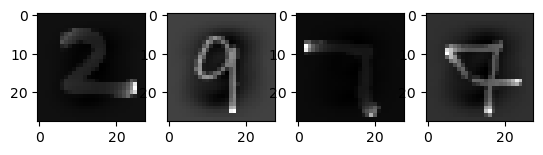

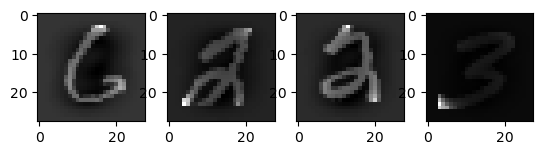

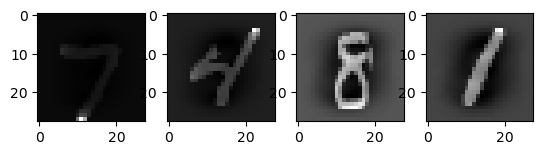

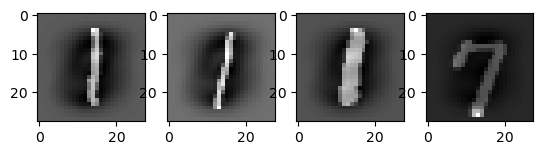

In [3]:
# display a 4x4 grid,
# choose 16 images randomly, display the images as well as corresponding label

for i in range(4):
    example=4
    seed=1000+i*10
    rng=np.random.default_rng(seed)
    fig,axes=plt.subplots(1,example)
    for sample, ax in zip(rng.choice(X_train, size=example,replace=False), axes):
        ax.imshow(sample.reshape(28, 28), cmap="gray")



## Building up parts of our classifier

**Activation functions**

In [4]:
def relu(z):
    return np.maximum(0,z) # a relu function, 0 for z<0,z for z>=0


def softmax(x):
    x = x - np.max(x,axis=1,keepdims=True)
    k = np.exp(x)
    return k /(np.sum(k, axis=1, keepdims=True)+1e-6)

**Notes about the Neural Network**
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [5]:
def init_params():
    int_size =784
    hid_size=256
    out_size=10
    w1=0.1*np.random.randn(int_size,hid_size)
    w2=0.1*np.random.randn(hid_size,out_size)
    bias1=np.zeros([1,hid_size])
    bias2=np.zeros([1,out_size])
    return w1,w2,bias1,bias2,int_size,hid_size,out_size

**Forward Propagation**

In [6]:
def forward_propg(X,w1,w2,bias1,bias2):
    z1=np.dot(X,w1)+bias1
    a1=relu(z1)
    z2=np.dot(a1,w2)+bias2
    a2=softmax(z2)
    return z1,z2,a1,a2
def relu_derivative(x):
    x[x>0]=0
    x[x<=0]=1
    return x

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [7]:
def backward_propg(X, y,w1,w2,bias1,bias2,lr):
    z1,z2,a1,a2=forward_propg(X,w1,w2,bias1,bias2)
    N=X_train.shape[0]
    gradient_z2=a2/N
    for i in range(N):
        gradient_z2[i][y[i]]-=1/N
    
    gradient_bias2=np.sum(gradient_z2,axis=0)
    gradient_w2=np.dot(np.transpose(a1),gradient_z2)
    gradient_a1=np.dot(gradient_z2,np.transpose(w2))
    gradient_relu=gradient_a1*(a1>0)
    gradient_bias1=np.sum(gradient_relu,axis=0)
    gradient_w1=np.dot(np.transpose(X),gradient_relu)
    w1=w1-gradient_w1*lr
    w2=w2-gradient_w2*lr
    bias1=bias1-gradient_bias1*lr
    bias2=bias2-gradient_bias2*lr
    return w1,bias1,w2,bias2

In [8]:
def cost_func(z2,a2,y):
    loss=0
    for i in range(np.size(z2,0)):
        loss+= -np.log(a2[i][y[i]])/(np.size(z2,0))
    return loss


## Integrate everything

In [9]:
def train(X, y, hidden_nodes, epochs,lr):
    # initialize weights.
    w1,w2,bias1,bias2,input_size,hidden_size,output_size=init_params()
    for i in range(epochs):
        # forward propagation
        z1,z2,a1,a2=forward_propg(X,w1,w2,bias1,bias2)
        loss=cost_func(z2,a2,y)
        # backward propagation
        w1,bias1,w2,bias2= backward_propg(X,y,w1,w2,bias1,bias2,lr)
        #print cost at every 100 or so iterations
        if i%100==0:
            print(f'Cost at 100th iteration is {i}={loss[0]}')
    return w1,w2,bias1,bias2

In [10]:
def predict(X, w1,w2, bias1, bias2):
    z1_test,z2_test,a1_test,a2_test=forward_propg(X,w1,w2,bias1,bias2)
    predictions=np.argmax(a2_test,axis=1)
    predictions = predictions.reshape([X.shape[0],1])
    print(predictions.shape)
    return predictions

In [11]:
def accuracy(predict, y):
    acc=np.mean(predict==y)*100
    print(f'% Accuracy: {acc}%')
    return acc

### Save as pickle

In [13]:
import pickle
import random

roll_num = "23B1848" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension
w1,w2,bias1,bias2=train(X_train,y_train,hidden_nodes=256,epochs=400,lr=0.3)
prediction=predict(X_test,w1,w2,bias1,bias2)
accuracy(prediction,y_test)
model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': w1, # layer 0 weight (784, z)
    'layer_0_bias': bias1, # layer 0 bias (1,z)
    'layer_1_wt': w2, # layer 1 weight (z, 10)
    'layer_1_bias': bias2 # layer 1 bias (1,10)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (1,hidden_dim)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (1,10)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

Cost at 100th iteration is 0=4.406231562235742
Cost at 100th iteration is 100=0.2087661127785171
Cost at 100th iteration is 200=0.14628862094694428
Cost at 100th iteration is 300=0.11273580149262272
(15000, 1)
% Accuracy: 94.96%


### Visualizing the results

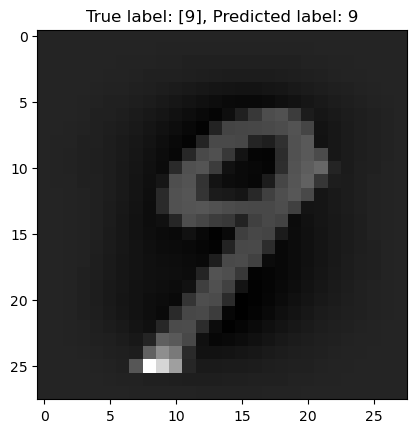

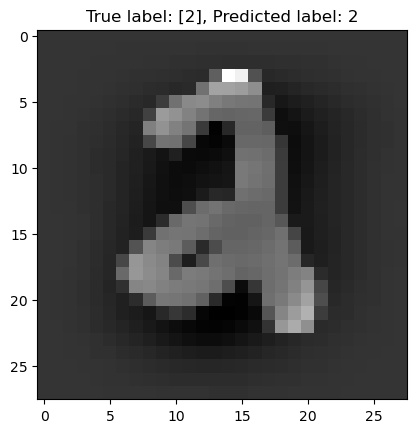

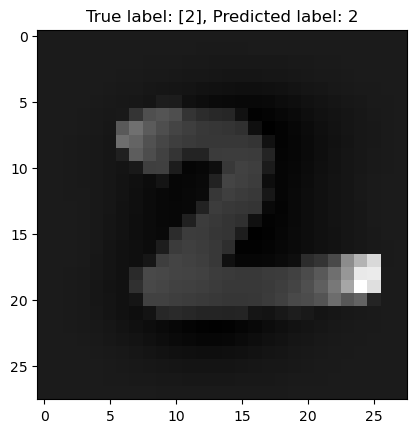

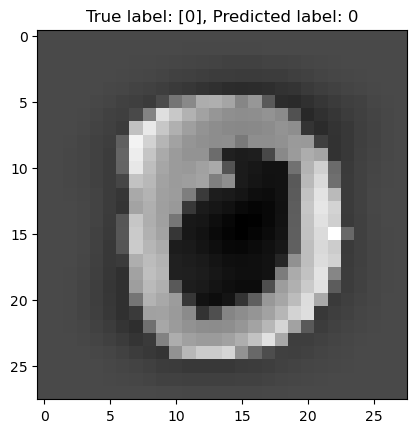

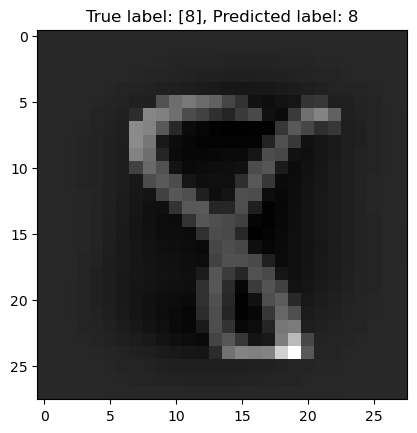

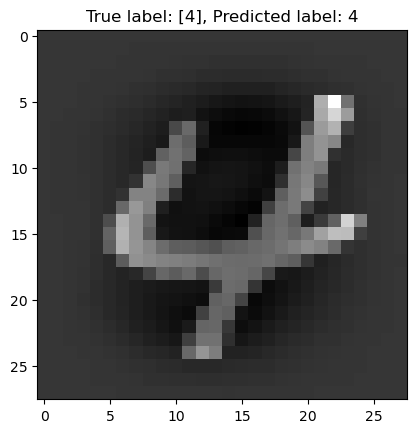

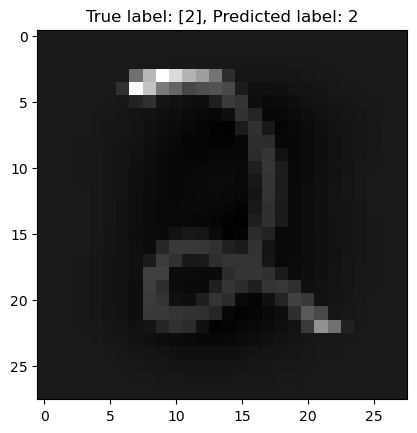

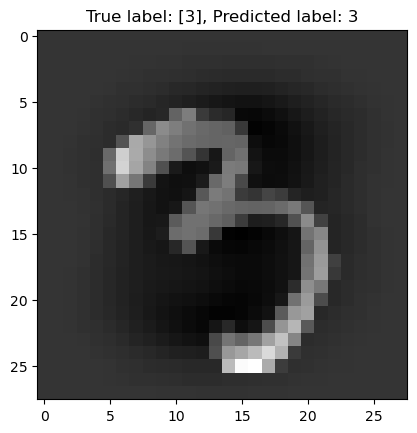

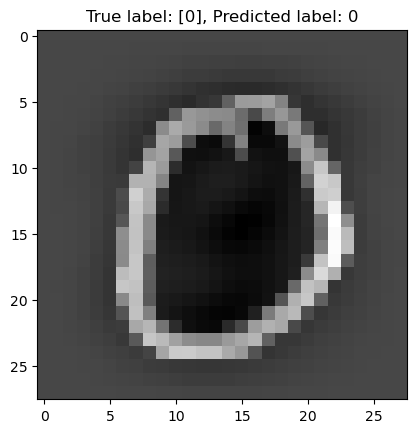

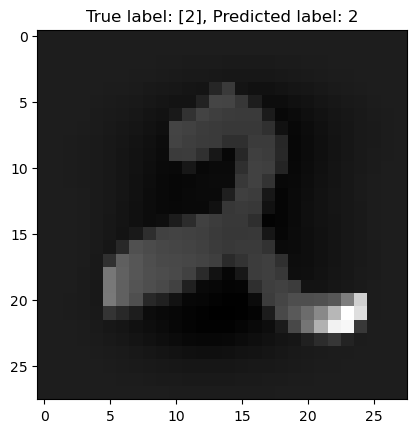

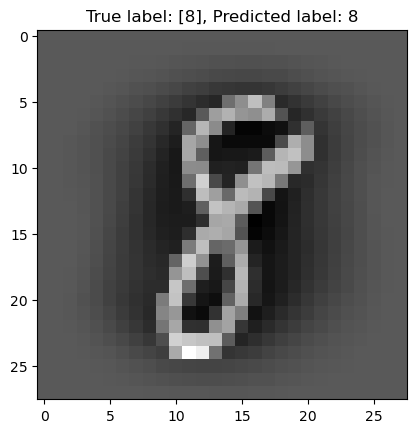

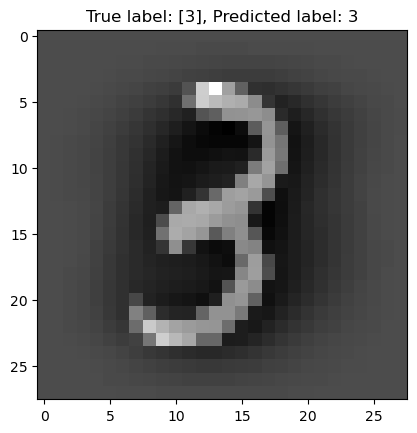

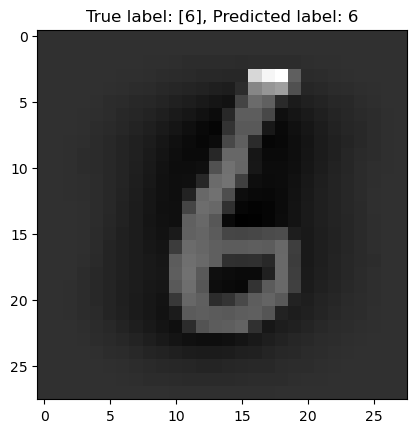

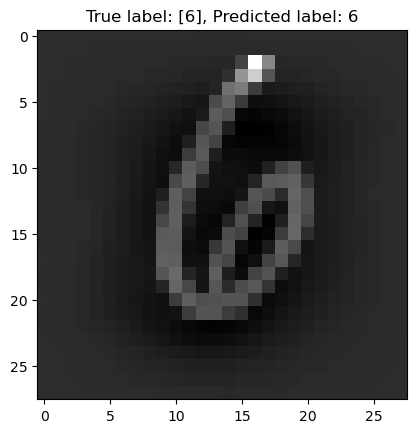

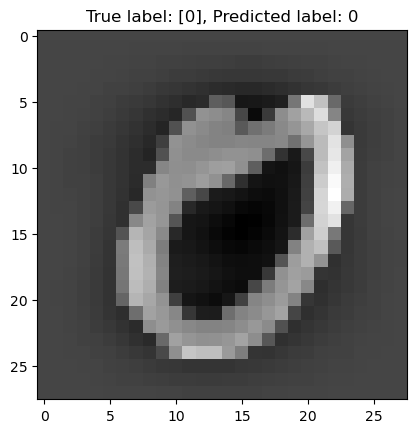

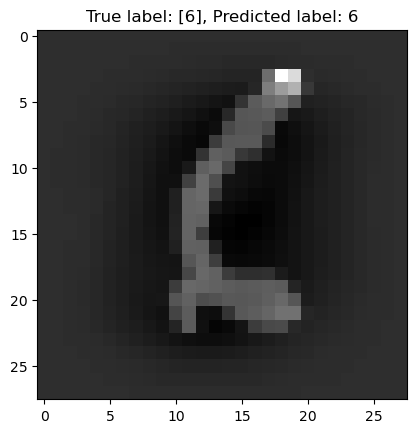

In [14]:
# Load the trained model
with open("model_23B1848.pkl", "rb") as f:
    model = pickle.load(f)

# Extract model parameters
layer_0_wt = model["layer_0_wt"]
layer_0_bias = model["layer_0_bias"]
layer_1_wt = model["layer_1_wt"]
layer_1_bias = model["layer_1_bias"]

def predict(X, layer_0_wt, layer_0_bias, layer_1_wt, layer_1_bias):
    # Forward pass
    z1 = np.dot(X, layer_0_wt) + layer_0_bias  # Weighted sums in layer 0
    a1 = np.maximum(z1, 0)  # ReLU activation in layer 0
    z2 = np.dot(a1, layer_1_wt) + layer_1_bias  # Weighted sums in layer 1
    predictions = np.argmax(z2, axis=1)  # Predicted class labels based on highest activation in layer 2

    return predictions

# Load test data 
X=X_test
true_labels =y_test

# Generate predictions on test data
predictions = predict(X, layer_0_wt, layer_0_bias, layer_1_wt, layer_1_bias)

# Visualize predictions on a random subset of test data
num_images = 16  # Number of images to visualize
random_indices = np.random.choice(len(X), num_images, replace=False)

for i in random_indices:
    # Display the image
    plt.imshow(X[i].reshape(28, 28), cmap="gray") 
    plt.title(f"True label: {true_labels[i]}, Predicted label: {predictions[i]}")
    plt.show()
